In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


# Creating data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

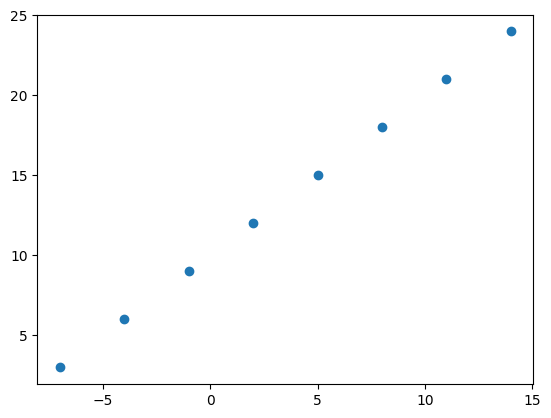

In [3]:
#@title
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)
plt.show()

In [4]:
X.shape

(8,)

In [5]:
y.shape

(8,)

In [6]:
X[0].shape

()

In [7]:
y[0].shape

()

X[0] and y[0]'s shapes are () this because these are scalar

In [8]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae, 
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# axis = -1 given because we want the new dimension on the last position
# for this model we could have used axis=1; it would give same result
# but for general rule we used axis = -1
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 652ms/step - loss: 9.4606 - mae: 9.4606
Epoch 2/5
1/1 [==============================] - 0s 19ms/step - loss: 9.3280 - mae: 9.3280
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 9.1955 - mae: 9.1955
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 9.0630 - mae: 9.0630
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 8.9305 - mae: 8.9305


In [9]:
model.predict([5])

1/1 [==============================] - 0s 106ms/step


array([[6.6956425]], dtype=float32)

In [10]:
# make predictions
model.predict([17])

1/1 [==============================] - 0s 45ms/step


array([[22.645184]], dtype=float32)

# Improving model

In [11]:
tf.random.set_global_generator(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 390ms/step - loss: 18.9350 - mae: 18.9350
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 18.6537 - mae: 18.6537
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 18.3725 - mae: 18.3725
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 18.0912 - mae: 18.0912
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 17.8100 - mae: 17.8100
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 17.5287 - mae: 17.5287
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 17.2475 - mae: 17.2475
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 16.9662 - mae: 16.9662
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 16.6850 - mae: 16.6850
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 16.4037 - mae: 16.4037
Epoch 11/100
1/1 [==============================

In [12]:
model.predict([17.0])

1/1 [==============================] - 0s 76ms/step


array([[29.36248]], dtype=float32)

# Evaluating a model

**Creating a large dataset**

In [13]:
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [14]:
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

**Split data into train and test set**

In [15]:
len(X)

50

In [16]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

**Visualizing the data**

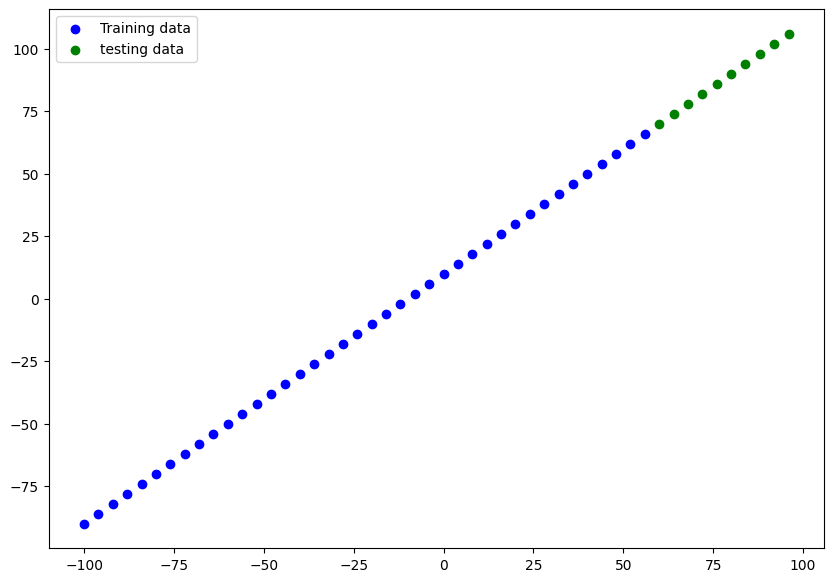

In [17]:
plt.figure(figsize=(10, 7))

plt.scatter(X_train, y_train, c='b', label='Training data')

plt.scatter(X_test, y_test, c='g', label='testing data')

plt.legend()
plt.show()

In [18]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

**Visualizing the model**

In [19]:
model.summary()

ValueError: ignored

- *model is giving error, because we did not fit our model*
- *to solve this we can define the input shape
in the dense layer*

In [20]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1])   # defining input shape
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [22]:
# tf.random.set_seed(42)

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(3, input_shape=[1])
# ])

# model.compile(loss="mae",
#            optimizer=tf.keras.optimizers.SGD(),
#            metrics="mae")

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


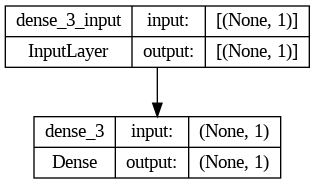

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

# Visualizing the predictions

In [27]:
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 54ms/step


In [28]:
y_preds

array([[44.403595],
       [47.277042],
       [50.15049 ],
       [53.023937],
       [55.897385],
       [58.770832],
       [61.644283],
       [64.51773 ],
       [67.391174],
       [70.264626]], dtype=float32)

In [29]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test,
                     test_labels=y_test, predictions=y_preds):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c='b', label="Training data")

  plt.scatter(test_data, test_labels, c='g', label="Testing data")

  plt.scatter(test_data, predictions, c='r', label="Predictions")

  plt.legend()
  plt.show()

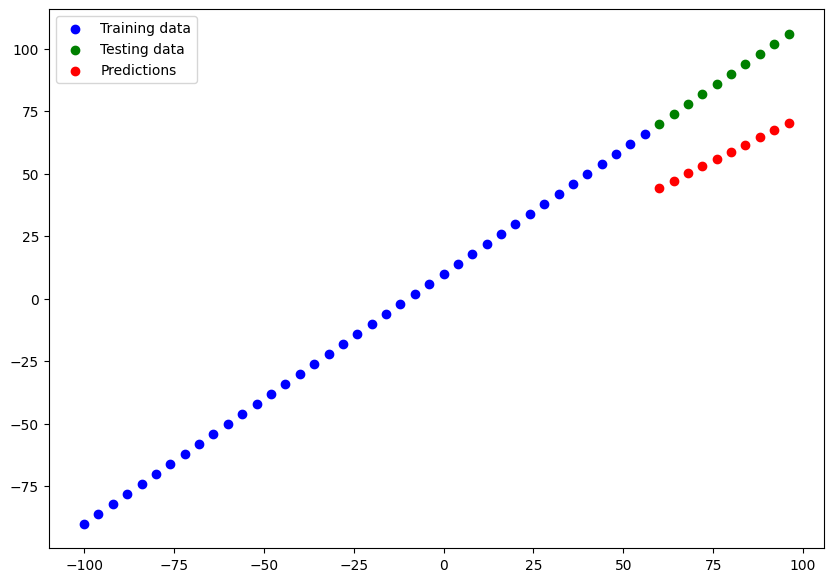

In [30]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test,
                     test_labels=y_test, predictions=y_preds)

# Evaluating predictions

In [31]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 170ms/step - loss: 30.6659 - mae: 30.6659


[30.665889739990234, 30.665889739990234]

In [32]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([43.596405, 40.722958, 37.84951 , 34.976063, 32.102615, 29.229168,
       26.355717, 23.48227 , 20.608826, 17.7883  ], dtype=float32)>

*'mae' should have given one value, instead its giving list of values*

In [33]:
y_test.shape, y_preds.shape

((10,), (10, 1))

In [34]:
y_test = y_test.reshape(10,1)
y_test.shape

(10, 1)

In [35]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([25.596405, 26.722958, 27.84951 , 28.976063, 30.102615, 31.229168,
       32.355717, 33.48227 , 34.608826, 35.735374], dtype=float32)>

In [36]:
y_test = y_test.reshape(10)
y_preds = y_preds.reshape(10)

In [37]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_preds)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=30.66589>

*Now "mae" worked*

In [38]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds)
mse
     

<tf.Tensor: shape=(), dtype=float32, numpy=950.86707>

# Improving our model

In [45]:
X_train = X_train.reshape(40, 1)
y_train = y_train.reshape(40, 1)

In [58]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

history = model.fit(X_train, y_train, epochs=100, verbose=0)

In [59]:
model.predict([17])

1/1 [==============================] - 0s 78ms/step


array([[21.235317]], dtype=float32)

In [60]:
import pandas as pd

Text(0, 0.5, 'loss')

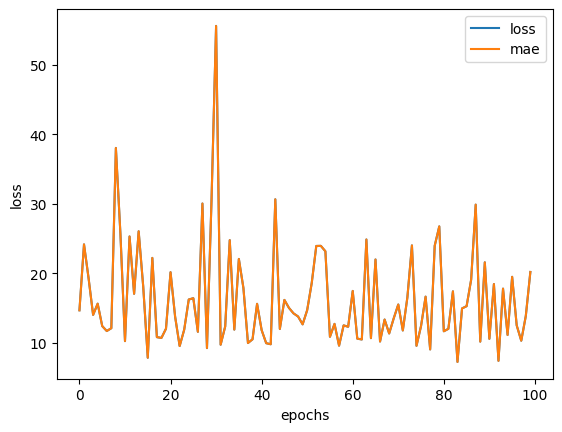

In [61]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")